In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns

In [3]:
data_path = './data/'

In [4]:
train_accounts = pd.read_csv(data_path + 'train_accounts.csv')

/home/ran/Dev/dh_yyr/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_accounts = pd.read_csv(data_path + 'train_accounts.csv')
train_users = pd.read_csv(data_path + 'train_users.csv')
# train_events = pd.read_csv(data_path + 'train_events.csv')
# train_subscriptions = pd.read_csv(data_path + 'train_subscriptions.csv')
test_accounts = pd.read_csv(data_path + 'test_accounts.csv')
test_users = pd.read_csv(data_path + 'test_users.csv')
# test_events = pd.read_csv(data_path + 'test_events.csv')
# test_subscriptions = pd.read_csv(data_path + 'test_subscriptions.csv')

accounts = pd.concat([train_accounts, test_accounts], sort=False)
users = pd.concat([train_users, test_users], sort=False)
events = pd.concat([train_events, test_events], sort=False)
subscriptions = pd.concat([train_subscriptions, test_subscriptions], sort=False)
print(f'accounts: {len(accounts)}')
print(f'users {len(users)}')
print(f'events {len(events)}')
print(f'subs {len(subscriptions)}')

In [33]:
na = train_accounts.isna().sum() / len(train_accounts) * 100
na[na > 0]
#train_accounts.count()

churn_date                 99.788396
churn_reason               98.242923
time_diff                  16.871858
region                      6.497902
country                     1.444664
subscription_started_at    97.637847
os                          0.006241
browser                    14.107129
company_size               79.186007
payment_currency            0.586720
max_team_size              10.837914
min_team_size              10.837914
industry                   36.059099
utm_cluster_id             51.409861
mrr                        96.651708
user_goal                  64.376150
user_description           77.307710
team_size                  29.893875
dtype: float64

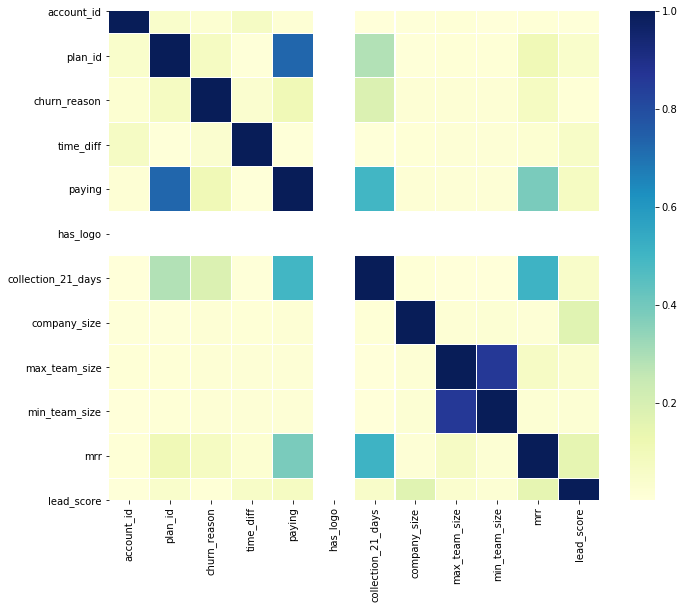

In [34]:
corrmat = train_accounts.select_dtypes('number').corr()
f, ax = plt.subplots(figsize = (11,9))
sns.heatmap(abs(corrmat), ax=ax, cmap='YlGnBu', linewidths= 0.1)

account_id+ acount_name - remove, just id
plan_id - remove, correlates with 'paying' and too many categories
subscription_started_at - invesitgate with 'paying'
paying - keep for later
collection_21_days - keep fpr later
mrr - keep for later
has_logo - remove, one value feature
created_at - keep for later
trial_start - keep for later
churn_* - investigate
country, time_diff, region - maybe keep country, can fill time diff using country, maybe convert country to continent or to x,y and group
device - keep, maybe remove tablet
os - keep, remove blackberry
browser - fill by existing dist
payment_curency - to keep and investigate, maybe non common currency tend to pay more
company_size - keep, maybe corr with lead. 80 nan, part of survy
min/max_team_size - keep, maybe create one feature range
industry - keep investigate
utm_cluster_id - same as industry
user_goal - part of survy
user_description - part of survy
team_size - part of survy

In [45]:
train_users['is_manager'] =  (train_users.seniority == 'manager').astype(int)
train_users['executive'] = (train_users.seniority == 'executive').astype(int)
train_users['director'] = (train_users.seniority == 'director').astype(int)

In [46]:
def is_public_domain(domain):
    public_domain = {'gmail.com','hotmail.com'}
    return domain in public_domain

In [47]:
train_users['is_public_domain'] = train_users['email'].apply(lambda email: 1 if is_public_domain(email[email.index('@')+1:]) else 0)

In [50]:
train_users.groupby('account_id')

In [ ]:
train_users.sample()

In [1]:
train_users[train_users.is_admin==1].samle().groupby('account_id').apply(lambda group: sum(group.seniority.isna()))

NameError: name 'train_users' is not defined